In [22]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools

## Years: 2007, 2008, 2009, 2010, 2011, 2012, 2023 and 2024

In [9]:
phys_mon_2024 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20240615_20240615.nc').isel(depth=1)
phys_mon_2023 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20230615_20230615.nc').isel(depth=1)
phys_mon_2012 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20120101_20121231.nc').isel(depth=1)
phys_mon_2011 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20110101_20111231.nc').isel(depth=1)
phys_mon_2010 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20100101_20101231.nc').isel(depth=1)
phys_mon_2009 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20090101_20091231.nc').isel(depth=1)
phys_mon_2008 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20080101_20081231.nc').isel(depth=1)
phys_mon_2007 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20070101_20071231.nc').isel(depth=1)

In [16]:
# get the bathymetry file
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [10]:
phys_mon_2024

<xarray.Dataset>
Dimensions:   (time: 1, gridY: 898, gridX: 398)
Coordinates:
  * time      (time) datetime64[ns] 2024-06-15T12:00:00
    depth     float32 1.5
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    vosaline  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_day_avg_phys_00_05_20240615_20240615
    description:  Day-averaged physics extracted from SalishSeaCast v202111 N...
    history:      2024-10-31 16:36 -07:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

/tmp/ipykernel_4058088/1847854599.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, cmap=cmap)


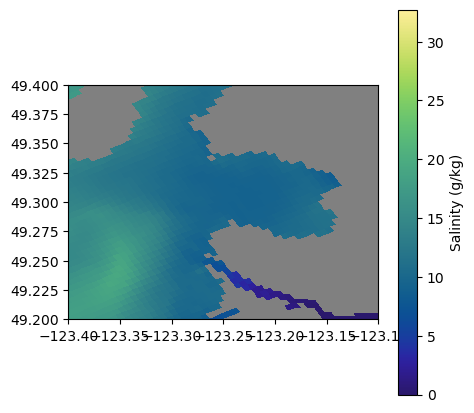

In [23]:
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
salinity = np.ma.masked_array(phys_mon_2024.vosaline[0], mask=tmask[0])
colours = ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')
ax.set_xlim([-123.4, -123.1])
ax.set_ylim([49.2, 49.4])
viz_tools.set_aspect(ax);